In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
#Problem 1
kernel = np.array([
    [0, (-1/4), 0], 
    [(-1/4), 1, (-1/4)], 
    [0, (-1/4), 0]]
)
#random 3x3 array for testing
test = np.random.rand(3, 3)
#multiplying matrices elementwise
out = 0
for i in range(3):
    for j in range(3):
        out += (kernel[i, j] * test[i, j])
#True average of the 4 adjacent center neighbors
avg = test[0, 1] + test[1, 0] + test[1, 2] + test[2, 1]
avg/=4
print("Average: "+ str(avg))
print("Center: " + str(test[1, 1]))
print("After kernel is applied: "+ str(out))

Average: 0.6239178202131161
Center: 0.5252974829117404
After kernel is applied: -0.09862033730137573


In [3]:
#Problem 2

In [4]:
def show(image1, image2):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.imshow(image1, cmap="gray")
    ax2.imshow(image2, cmap="gray")

def filter_lin(image, kernel):
    (x, y) = image.shape[0], image.shape[1]
    (r, c) = kernel.shape[0], kernel.shape[1]
    out = []
    for i in range(x-r):
        row = []
        for j in range(y-c):
            row.append(mult(image, kernel, i, j))
        out.append(row)
    out = np.array(out)
    return out
def mult(image, kernel, startx, starty):
    combo = 0
    (r, c) = kernel.shape[0], kernel.shape[1]
    arr = np.zeros((3, 3))
    for i in range(startx, startx+r):
        for j in range(starty, starty+c):
            combo += (image[i][j]*kernel[i-startx][j-starty])
#             arr[i-startx, j-starty] = image[i][j]
#     sum_ = (arr.sum()-np. * kernel.sum())**0.5
#     return combo/sum_
    return combo

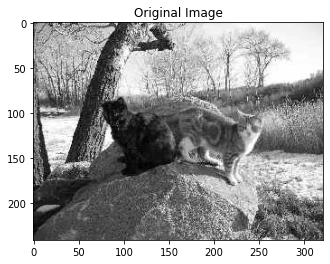

In [5]:
#Problem 3
image_path = "./sample1.jpg"
img = cv2.imread(image_path, 0)
plt.title("Original Image")
plt.imshow(img, cmap="gray")

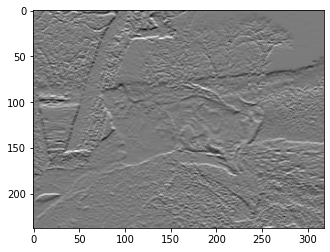

In [21]:
#Horizontal edge kernel
horiz = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])
horiz = np.fliplr(np.flipud(horiz))
out_horiz = filter_lin(img, horiz)
plt.imshow(out, cmap="gray")

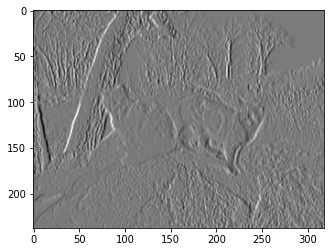

In [22]:
#Vertical Edge Kernel
vert = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
vert = np.fliplr(np.flipud(vert))
out_vert = filter_lin(img, vert)
plt.imshow(out_vert, cmap="gray")

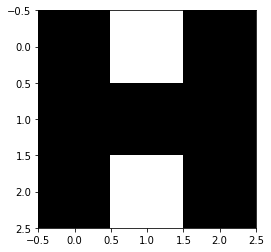

In [26]:
#Horizontal filter to frequency domain
freq_horiz = np.fft.fft2(horiz)
freq_horiz = np.fft.fftshift(freq_horiz)
freq_horiz = np.log(1 + np.abs(freq_horiz))
plt.imshow(freq_horiz, cmap="gray")

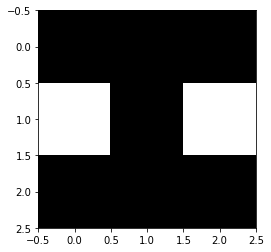

In [27]:
#vertical filter to frequency domain
freq_vert = np.fft.fft2(vert)
freq_vert = np.fft.fftshift(freq_vert)
freq_vert = np.log(1 + np.abs(freq_vert))
plt.imshow(freq_vert, cmap="gray")

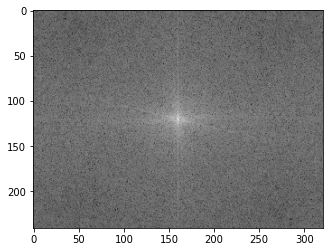

In [33]:
#Sample1 Image to frequency domain
freq_img = np.fft.fft2(img)
freq_img = np.fft.fftshift(freq_img)
freq_img = np.log(1+np.abs(freq_img))
plt.imshow(freq_img, cmap="gray")

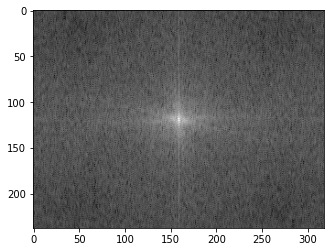

In [34]:
#Horizontal Edge in frequency domain
freq_out_horiz = np.fliplr(np.flipud(freq_horiz))
freq_out_horiz = filter_lin(freq_img, freq_horiz)
plt.imshow(freq_out_horiz, cmap="gray")

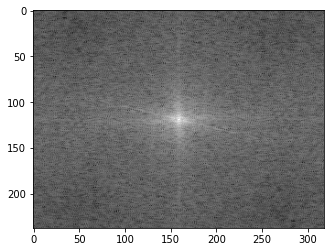

In [35]:
#Vertical Edge in Frequency Domain
freq_out_vert = np.fliplr(np.flipud(freq_vert))
freq_out_vert = filter_lin(freq_img, freq_out_vert)
plt.imshow(freq_out_vert, cmap="gray")

In [36]:
#Data from frequency to spatial domain (Horizontal Edge)


In [ ]:
#Data from frequency to spatial domain (Vertical Edge)

In [ ]:
#Sum of horizontal and vertical components